In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

from data_simulators import (
    ARGenerator,
    NonlinearARGenerator,
    LongMemoryGenerator,
    SwitchingARGenerator,
    LatentFactorGenerator,
    generate_datasets
)

np.random.seed(0)
torch.manual_seed(0)


In [3]:
T = 3000

generators = {
    "AR": ARGenerator(T=T, phi=[0.7, -0.2], sigma=0.2),
    "NAR": NonlinearARGenerator(T=T, p=5, sigma=0.1),
    "LongMemory": LongMemoryGenerator(T=T, L=80, sigma=0.1),
    "Switching": SwitchingARGenerator(
        T=T,
        phis=[0.1, 0.95],
        transition_matrix=[[0.97, 0.03], [0.05, 0.95]],
        sigma=0.15
    ),
    "LatentFactor": LatentFactorGenerator(T=T, d=3, sigma=0.1),
}


(3000, 3)


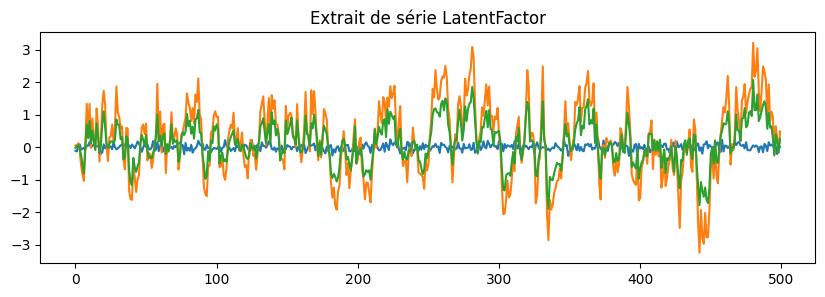

In [13]:
datasets = generate_datasets(generators, n_datasets=5)

idx = 4
key = list(datasets.keys())[idx]
x = datasets[key][0]   # shape (T, d)
print(x.shape)

plt.figure(figsize=(10, 3))
plt.plot(x[:500])
plt.title(f"Extrait de série {key}")
plt.show()
